In [3]:
import aiida
from aiida import load_dbenv
load_dbenv()
from aiida.orm import load_node
w = load_node(2612)

In [4]:
w

<WorkCalculation: uuid: e0512cbd-7a99-4f16-bf13-a4c4d73a8960 (pk: 2612)>

In [5]:
w.has_finished_ok()

True

In [6]:
w.get_attrs()

{u'_finished': True, u'_process_label': u'ExampleWorkflow', u'_sealed': True}

In [7]:
res = w.out.bands.show_mpl()

<Figure size 640x480 with 1 Axes>

In [8]:
def plot_mpl(all_data):
    from matplotlib import rc
    # Uncomment to change default font
    #rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
    rc('font', **{'family': 'serif', 'serif': ['Computer Modern', 'CMU Serif', 'Times New Roman']})
    # To use proper font for, e.g., Gamma if usetex is set to False
    rc('mathtext', fontset='cm')

    rc('text', usetex=True)
    import matplotlib.pyplot as plt
    plt.rcParams.update({'text.latex.preview': True})

    import pylab as pl

    # I use json to make sure the input is sanitized
    import json

    print_comment = False

    if not all_data.get('use_latex', False):
        rc('text', usetex=False)

    #x = all_data['x']
    #bands = all_data['bands']
    paths = all_data['paths']
    tick_pos = all_data['tick_pos']
    tick_labels = all_data['tick_labels']

    # Option for bands (all, or those of type 1 if there are two spins)
    further_plot_options1 = {}
    further_plot_options1['color'] = all_data.get('bands_color', 'k')
    further_plot_options1['linewidth'] = all_data.get('bands_linewidth', 0.5)
    further_plot_options1['linestyle'] = all_data.get('bands_linestyle', None)
    further_plot_options1['marker'] = all_data.get('bands_marker', None)
    further_plot_options1['markersize'] = all_data.get('bands_markersize', None)
    further_plot_options1['markeredgecolor'] = all_data.get('bands_markeredgecolor', None)
    further_plot_options1['markeredgewidth'] = all_data.get('bands_markeredgewidth', None)
    further_plot_options1['markerfacecolor'] = all_data.get('bands_markerfacecolor', None)

    # Options for second-type of bands if present (e.g. spin up vs. spin down)
    further_plot_options2 = {}
    further_plot_options2['color'] = all_data.get('bands_color2', 'r')
    # Use the values of further_plot_options1 by default
    further_plot_options2['linewidth'] = all_data.get('bands_linewidth2',
        further_plot_options1['linewidth']
        )
    further_plot_options2['linestyle'] = all_data.get('bands_linestyle2',
        further_plot_options1['linestyle']
        )
    further_plot_options2['marker'] = all_data.get('bands_marker2',
        further_plot_options1['marker']
        )
    further_plot_options2['markersize'] = all_data.get('bands_markersize2',
        further_plot_options1['markersize']
        )
    further_plot_options2['markeredgecolor'] = all_data.get('bands_markeredgecolor2',
        further_plot_options1['markeredgecolor']
        )
    further_plot_options2['markeredgewidth'] = all_data.get('bands_markeredgewidth2',
        further_plot_options1['markeredgewidth']
        )
    further_plot_options2['markerfacecolor'] = all_data.get('bands_markerfacecolor2',
        further_plot_options1['markerfacecolor']
        )

    fig = pl.figure()
    p = fig.add_subplot(1,1,1)

    first_band_1 = True
    first_band_2 = True

    for path in paths:
        if path['length'] <= 1:
            # Avoid printing empty lines
            continue
        x = path['x']
        #for band in bands:
        for band, band_type in zip(path['values'], all_data['band_type_idx']):

            # For now we support only two colors
            if band_type % 2 == 0:
                further_plot_options = further_plot_options1
            else:
                further_plot_options = further_plot_options2

            # Put the legend text only once
            label = None
            if first_band_1 and band_type % 2 == 0:
                first_band_1 = False
                label = all_data.get('legend_text', None)
            elif first_band_2 and band_type % 2 == 1:
                first_band_2 = False
                label = all_data.get('legend_text2', None)

            p.plot(x, band, label=label,
                   **further_plot_options
            )


    p.set_xticks(tick_pos)
    p.set_xticklabels(tick_labels)
    p.set_xlim([all_data['x_min_lim'], all_data['x_max_lim']])
    p.set_ylim([all_data['y_min_lim'], all_data['y_max_lim']])
    p.xaxis.grid(True, which='major', color='#888888', linestyle='-', linewidth=0.5)

    if all_data.get('plot_zero_axis', False):
        p.axhline(
            0.,
            color=all_data.get('zero_axis_color', '#888888'),
            linestyle=all_data.get('zero_axis_linestyle', '--'),
            linewidth=all_data.get('zero_axis_linewidth', 0.5),
            )
    if all_data['title']:
        p.set_title(all_data['title'])
    if all_data['legend_text']:
        p.legend(loc='best')
    p.set_ylabel(all_data['yaxis_label'])

    try:
        if print_comment:
            print all_data['comment']
    except KeyError:
        pass
    pl.show()

In [19]:
#all_data = json.loads(w.out.bands._exportstring(fileformat='mpl_withjson')[1]['_data.json'])
all_data = w.out.bands._matplotlib_get_dict()

In [20]:
print "Here"
#print all_data

Here
{'comment': '# This file has been created with AiiDA v. 0.11.1\n# If you use AiiDA for publication purposes, please cite:\n# G. Pizzi, A. Cepellotti, R. Sabatini, N. Marzari, and B. Kozinsky, "AiiDA: automated interactive infrastructure and database for computational science", Comp. Mat. Sci 111, 218-230 (2016); http://dx.doi.org/10.1016/j.commatsci.2015.09.013 - http://www.aiida.net.\n# \n# Dumped from BandsData UUID=cb21acdb-847d-4df5-9f2c-9727f4a0d489\n# \tpoints\tbands\n# \t202\t20\n# \n# \tlabel\tpoint\n# \tGAMMA\t0.00000000\n# \tX\t1.16355283\n# \tU\t1.57493088\n# \tK\t1.57493088\n# \tGAMMA\t2.80906503\n# \tL\t3.81673135\n# \tW\t4.63948745\n# \tX\t5.22126386', 'paths': [{'from': u'GAMMA', 'two_band_types': True, 'to': u'X', 'length': 45, 'values': [[-16.551522, -16.551494, -16.551405, -16.551259, -16.551054, -16.549984, -16.549673, -16.548843, -16.548423, -16.547952, -16.547766, -16.547199, -16.546265, -16.546154, -16.545487, -16.546333, -16.544771, -16.54424, -16.543484, -1

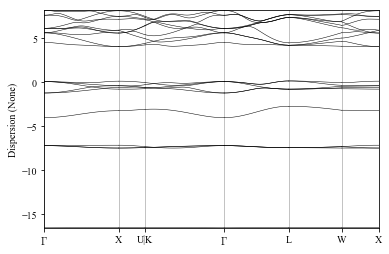

In [21]:
plot_mpl(all_data)